# A. 데이터 전처리 - 데이터 읽어오기
- Pandas를 사용하여 csv 파일 (NFLX.csv)을 DataFrame으로 읽어온다.
- ['Data', 'Open', 'High', 'Low', 'Close'] 필드만 읽어오도록 구성한다.

***처음부터 실행시켜야 다른 문제에서 오류 없음***

In [51]:
import csv
import numpy as np
import pandas as pd

def file_open():
    np_arr = np.loadtxt('archive/NFLX.csv',delimiter=",", encoding='cp949', dtype=str)
    return np_arr

arr = file_open()
columns = arr[0]
arr = np.delete(arr, 0,0)
df = pd.DataFrame(arr, columns = columns)
df.loc[:, 'Date':'Close']

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력

Text(0.5, 1.0, 'NFLX Close Price')

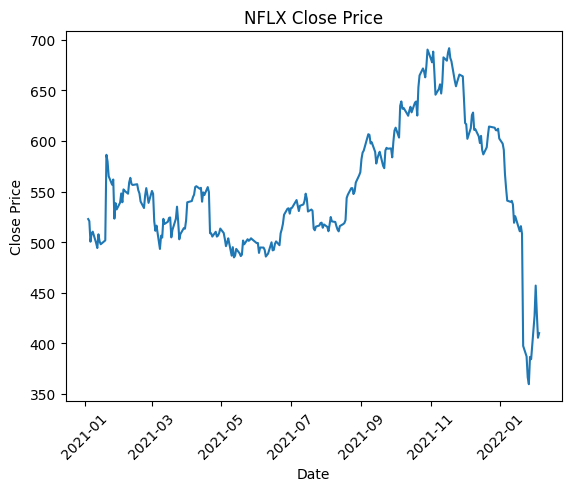

In [52]:
import matplotlib.pyplot as plt

new_data = df[pd.to_datetime(df['Date']) > pd.to_datetime('2020-12-31')]
x = list(pd.to_datetime(new_data['Date']))
y = list(pd.to_numeric(new_data['Close']))

plt.plot(x,y)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Close Price')
plt.title('NFLX Close Price')
    

# C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [53]:
price_list = list(pd.to_numeric(new_data['Close']).sort_values())
max_value = price_list[-1]
min_value = price_list[0]
print("최고 종가:", max_value)
print("최저 종가:", min_value)

최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14980\3326285976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Date'] = pd.to_datetime(new_data['Date'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14980\3326285976.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Close'] = pd.to_numeric(new_data['Close'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14980\3326285976.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = 

Text(0.5, 1.0, 'Monthly Average Close Price')

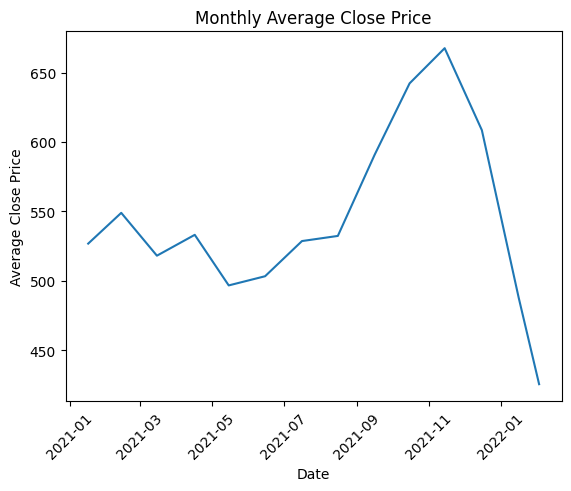

In [54]:
def file_open():
    np_arr = np.loadtxt('archive/NFLX.csv',delimiter=",", encoding='cp949', dtype=str)
    return np_arr

arr = file_open()
columns = arr[0]
arr = np.delete(arr, 0,0)
df = pd.DataFrame(arr, columns = columns)

new_data = df[pd.to_datetime(df['Date']) > pd.to_datetime('2020-12-31')]
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data['Close'] = pd.to_numeric(new_data['Close'])
grouped = new_data.groupby(pd.Grouper(key='Date', freq = 'M'))
mean_month = grouped['Date'].mean()
mean_close_price = grouped['Close'].mean()

plt.plot(mean_month,mean_close_price)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Close Price')
plt.title('Monthly Average Close Price')

# E. 데이터 시각화 - 2022년 이후 최고 최저 종가 시각화

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14980\3464607033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Date'] = pd.to_datetime(new_data['Date'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14980\3464607033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Close'] = pd.to_numeric(new_data['Close'])
C:\Users\SSAFY\AppData\Local\Temp\ipykernel_14980\3464607033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

Text(0.5, 1.0, 'High, Low and Close Prices since January 2022')

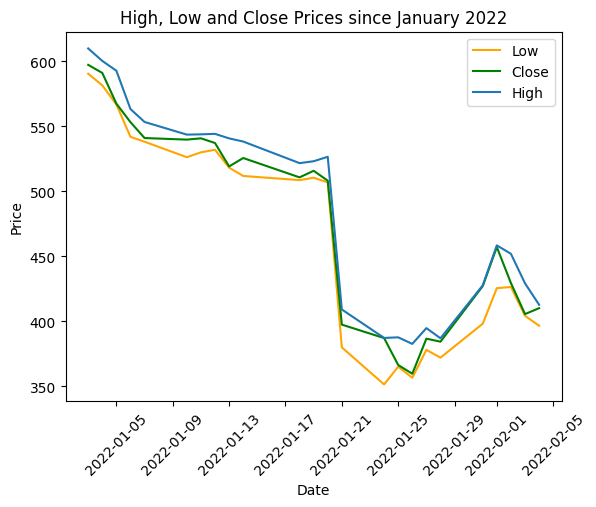

In [56]:
new_data = df[pd.to_datetime(df['Date']) > pd.to_datetime('2021-12-31')]
new_data['Date'] = pd.to_datetime(new_data['Date'])
new_data['Close'] = pd.to_numeric(new_data['Close'])
new_data['High'] = pd.to_numeric(new_data['High'])
new_data['Low'] = pd.to_numeric(new_data['Low'])



plt.plot(new_data['Date'], new_data['Low'], color='orange')

plt.plot(new_data['Date'], new_data['Close'], color = 'green')

plt.plot(new_data['Date'], new_data['High'])
plt.legend(['Low','Close','High'])

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')

plt.title('High, Low and Close Prices since January 2022')